In [3]:
image_name="/Users/miao/Downloads/eyedata/Edema_trainingset/original_images/PC008_MacularCube512x128_9-12-2013_10-50-5_OD_sn9624_cube_z.img/28.bmp" 
label_name="/Users/miao/Downloads/eyedata/Edema_trainingset/label_images/PC008_MacularCube512x128_9-12-2013_10-50-5_OD_sn9624_cube_z_labelMark/28.bmp"

In [11]:
import numpy as np
from PIL import Image

In [5]:
image=np.array(Image.open(image_name), np.float32)
label=np.array(Image.open(label_name), np.float32)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
print(image.shape, label.shape)

((1024, 512), (1024, 512))


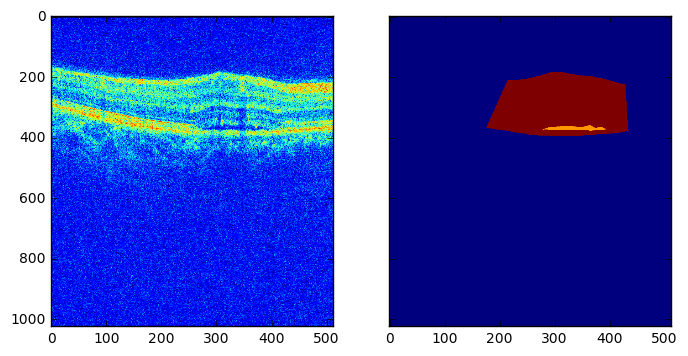

In [16]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(image, aspect="auto")
ax[1].imshow(label, aspect="auto")

In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
!pwd

/Users/miao/project/github/tf_unet


In [4]:
from eyeData import EyeDataProvider

In [5]:
train_data_path = "/Users/miao/Downloads/eyedata/Edema_trainingset/original_images/P0012_MacularCube512x128_8-7-2014_13-30-44_OS_sn27947_cube_z.img/*.bmp"

In [6]:
train_data_provider = EyeDataProvider(train_data_path, n_class=4)

Number of files used: 128


/Users/miao/Downloads/eyedata/Edema_trainingset/original_images/P0012_MacularCube512x128_8-7-2014_13-30-44_OS_sn27947_cube_z.img/79.bmp /Users/miao/Downloads/eyedata/Edema_trainingset/label_images/P0012_MacularCube512x128_8-7-2014_13-30-44_OS_sn27947_cube_z_labelMark/79.bmp
[  0 191 255]
(1, 1024, 512, 1) (1, 1024, 512, 4)


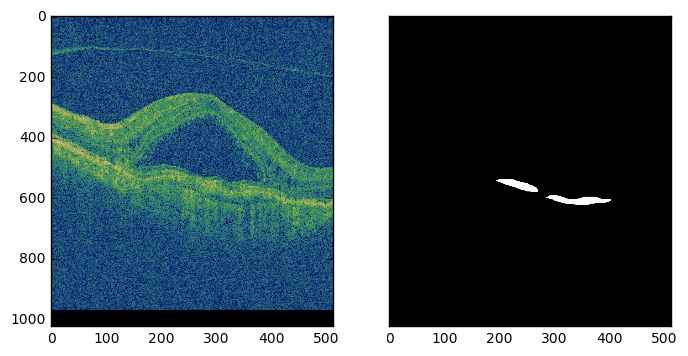

In [16]:
x_test, y_test = train_data_provider(1)
print(x_test.shape, y_test.shape)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,2], aspect="auto")

In [9]:
len(np.unique(y_test))

2

In [14]:
1024*512*4

2097152

In [12]:
label=np.array(Image.open("/Users/miao/Downloads/eyedata/Edema_trainingset/label_images/P0012_MacularCube512x128_8-7-2014_13-30-44_OS_sn27947_cube_z_labelMark/42.bmp"), np.float32)

In [13]:
np.unique(np)

array([  0., 255.], dtype=float32)

In [ ]:
#test

In [39]:
train_data_path = "/Users/miao/Downloads/eyedata/Edema_trainingset/original_images/PC034_MacularCube512x128_12-10-2013_10-48-27_OS_sn14231_cube_z.img/20.bmp"
train_data_provider = EyeDataProvider(train_data_path, n_class=4)

Number of files used: 1


In [22]:
net = unet.Unet(channels=train_data_provider.channels, n_class=train_data_provider.n_class, layers=3, features_root=16)

2018-09-13 22:37:47,882 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [40]:
x_test, y_test = train_data_provider(1)

/Users/miao/Downloads/eyedata/Edema_trainingset/original_images/PC034_MacularCube512x128_12-10-2013_10-48-27_OS_sn14231_cube_z.img/20.bmp /Users/miao/Downloads/eyedata/Edema_trainingset/label_images/PC034_MacularCube512x128_12-10-2013_10-48-27_OS_sn14231_cube_z_labelMark/20.bmp
[  0 191 255]


In [41]:
prediction = net.predict("./unet_trained_eye_data/model.ckpt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained_eye_data/model.ckpt


2018-09-13 23:00:11,805 Restoring parameters from ./unet_trained_eye_data/model.ckpt
2018-09-13 23:00:11,865 Model restored from file: ./unet_trained_eye_data/model.ckpt


False False


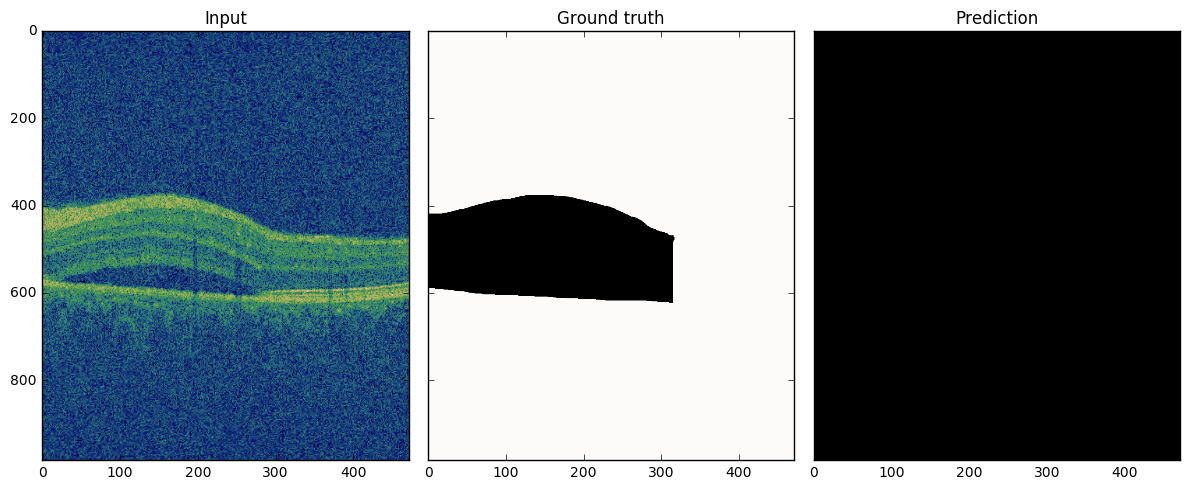

In [42]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto")
mask = prediction[0,...,0]>0.9
print(np.max(mask),np.min(mask))
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()